**Задание 1**
Выберите 5 неоднозначных лексем и соберите для них словарные значения (толкования). Можно использовать МАС или любой другой толковый словарь. Обязательно укажите, каким словарем вы пользовались. - 1 балл за ручной сбор данных, 1 балл за краулинг

In [75]:
# ручной

**Задание 2**
Выберите один или несколько корпусов коллекции Corus, извлеките оттуда все предложения, где содержатся ваши неоднозначные слова. - 1 балл

###Собираем корпус предложений, в которых содержатся выбранные многозначные лексемы

In [ ]:
!wget https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu
!wget https://github.com/UniversalDependencies/UD_Russian-GSD/raw/master/ru_gsd-ud-dev.conllu
!wget https://github.com/UniversalDependencies/UD_Russian-Taiga/raw/master/ru_taiga-ud-dev.conllu
!wget https://github.com/UniversalDependencies/UD_Russian-PUD/raw/master/ru_pud-ud-test.conllu

In [6]:
!pip install conllu

In [10]:
from conllu import parse
import re

In [50]:
def load_conllu(file_path):
    # функция для загрузки датасета
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.read()
    return parse(data)

In [52]:
target_words = ["звезда", "кисть", "кнопка", "номер", "шляпка"]

In [53]:
dev_data_gsd = load_conllu("ru_gsd-ud-dev.conllu")
dev_data_syntagrus = load_conllu("ru_syntagrus-ud-dev.conllu")
dev_data_taiga = load_conllu("ru_taiga-ud-dev.conllu")
test_data_pud = load_conllu("ru_pud-ud-test.conllu")

In [54]:
all_sentences = []
all_sentences.extend(dev_data_gsd)
all_sentences.extend(dev_data_syntagrus)
all_sentences.extend(dev_data_taiga)
all_sentences.extend(test_data_pud)

In [56]:
print(len(all_sentences))

11431


In [55]:
print("Пример предложений из объединенного списка:")
for sentence in all_sentences[:5]:
    print(" ".join([token_info['form'] for token_info in sentence]))

Пример предложений из объединенного списка:
Начальный ролик , или опенинг ( от , сокр. : OP ) , как правило , представляет собой анимацию , изображающую главных героев аниме и отражающую его стиль .
Стропило , означающее победителя , окрашено в красный цвет -- цвет гербового щита Москвы , стропило , означающее побеждённого , имеет зелёный цвет -- цвет ислама .
Он и являлся &#39;&#39; полным властелином всей Ахсауской местности &#39;&#39; и родоначальником Телакуровых , построивших здесь свой замок .
Сержант посоветовал Баклсу пойти на работу водителем машины скорой помощи .
Барыкина иногда называют `` отцом русского регги &#39;&#39; .


In [57]:
sentences_with_target_words = []
for sentence in all_sentences:
    sentence_text = " ".join([token_info['form'] for token_info in sentence])
    if any(word.lower() in sentence_text.lower() for word in target_words):
        sentences_with_target_words.append(sentence_text)

In [58]:
print("Пример предложений, содержащих target_words:")
for sentence in sentences_with_target_words[:5]:
    print(sentence)

Пример предложений, содержащих target_words:
До 2007 года большинство из них имели стандартные одно- и двузначные номера . ( * ) до перенумерации 2007/2008 года .
ni ) ! ) -- число сочетаний из n по i , где n -- степень полинома , i -- порядковый номер опорной вершины .
Кроме того , в 1963 году Всесоюзный совет ДСО профсоюзов учреждает жетон " Спасательный отряд " , а Федерация альпинизма СССР включает в нормативы для спортсменов первого разряда выполнение требований на получение номерного жетона " Спасательный отряд " .
По окончании курса теоретической и практической подготовки успешно сдавшим экзамен присваивается звание " спасатель " и вручается номерной жетон " Спасение в горах " .
После чего он вспоминал еще одно , чуть ли не самое важное дело , и списочек приходилось переписывать заново , чтобы это дело заняло свой порядковый номер .


In [59]:
len(sentences_with_target_words)

43

**Задание 3**
Разбейте полученные контексты по значениям двумя любыми способами (вы можете использовать способы с семинара, заменить там эмбеддинги, реализовать какой-то свой способ). Напоминалка: в случае с AdaGram вы сразу получаете какой-то номер значения, с ELMo и другими контекстуальными эмбеддингами — нужно кластеризовать. - 2 балла

### Кластеризируем с использованием эмбеддингов Word2Vec

In [61]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [62]:
def tokenize(sentence):
    return re.findall(r'\b\w+\b', sentence.lower())

In [63]:
all_tokens = [tokenize(sentence) for sentence in sentences_with_target_words]
word2vec_model = Word2Vec(all_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [64]:
word_vectors = [word2vec_model.wv[word] for sentence in all_tokens for word in sentence]

Кластеризируем, используя KMeans

In [65]:
kmeans = KMeans(n_clusters=5, random_state=42)
word_clusters = kmeans.fit_predict(word_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(StandardScaler().fit_transform(word_vectors))

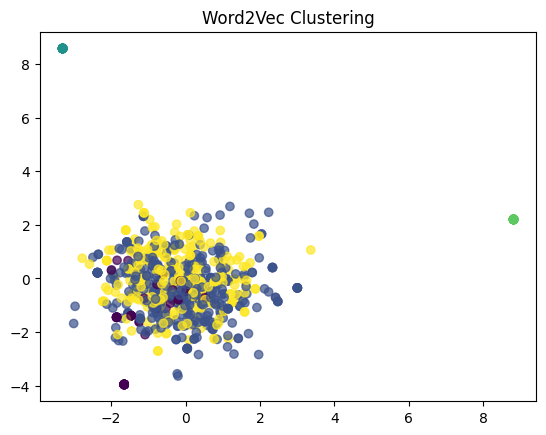

In [67]:
import matplotlib.pyplot as plt

plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c=word_clusters, cmap='viridis', alpha=0.7)
plt.title('Word2Vec Clustering')
plt.show()
